In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dhoogla/csecicids2018")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/csecicids2018


In [8]:
!pip install spade

^C
ERROR: Operation cancelled by user


In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dhoogla/unswnb15")

print("Path to dataset files:", path)



Path to dataset files: /kaggle/input/unswnb15


In [12]:
import kagglehub
import pandas as pd
import os

# Download dataset
path = kagglehub.dataset_download("dhoogla/unswnb15")

# List files
print("Files in dataset:", os.listdir(path))

# Load Parquet files
train_path = os.path.join(path, "UNSW_NB15_training-set.parquet")
test_path = os.path.join(path, "UNSW_NB15_testing-set.parquet")

df_train = pd.read_parquet(train_path)
df_test = pd.read_parquet(test_path)

# Combine both (optional)
df = pd.concat([df_train, df_test], ignore_index=True)

print("Training set shape:", df_train.shape)
print("Testing set shape:", df_test.shape)
print("Combined shape:", df.shape)
print(df.head())


Files in dataset: ['UNSW_NB15_testing-set.parquet', 'UNSW_NB15_training-set.parquet']
Training set shape: (175341, 36)
Testing set shape: (82332, 36)
Combined shape: (257673, 36)
        dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0  0.121478   tcp       -   FIN      6      4     258     172  74.087486   
1  0.649902   tcp       -   FIN     14     38     734   42014  78.473373   
2  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4  0.449454   tcp       -   FIN     10      6     534     268  33.373825   

          sload  ...  trans_depth  response_body_len  ct_src_dport_ltm  \
0  14158.942383  ...            0                  0                 1   
1   8395.112305  ...            0                  0                 1   
2   1572.271851  ...            0                  0                 1   
3   2740.178955  ...            0                  0                

In [13]:
df = pd.concat([df_train, df_test], ignore_index=True)
print(df)


             dur proto service state  spkts  dpkts  sbytes  dbytes  \
0       0.121478   tcp       -   FIN      6      4     258     172   
1       0.649902   tcp       -   FIN     14     38     734   42014   
2       1.623129   tcp       -   FIN      8     16     364   13186   
3       1.681642   tcp     ftp   FIN     12     12     628     770   
4       0.449454   tcp       -   FIN     10      6     534     268   
...          ...   ...     ...   ...    ...    ...     ...     ...   
257668  0.000005   udp       -   INT      2      0     104       0   
257669  1.106101   tcp       -   FIN     20      8   18062     354   
257670  0.000000   arp       -   INT      1      0      46       0   
257671  0.000000   arp       -   INT      1      0      46       0   
257672  0.000009   udp       -   INT      2      0     104       0   

                 rate         sload  ...  trans_depth  response_body_len  \
0           74.087486  1.415894e+04  ...            0                  0   
1      

In [14]:
print(df.isnull().sum())


dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64


In [15]:
print(df['label'].value_counts())

label
1    164673
0     93000
Name: count, dtype: int64


In [16]:
print(df['attack_cat'].value_counts())

attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64


In [17]:
print(df.dtypes)

dur                   float32
proto                  object
service              category
state                  object
spkts                   int16
dpkts                   int16
sbytes                  int32
dbytes                  int32
rate                  float32
sload                 float32
dload                 float32
sloss                   int16
dloss                   int16
sinpkt                float32
dinpkt                float32
sjit                  float32
djit                  float32
swin                    int16
stcpb                   int64
dtcpb                   int64
dwin                    int16
tcprtt                float32
synack                float32
ackdat                float32
smean                   int16
dmean                   int16
trans_depth             int16
response_body_len       int32
ct_src_dport_ltm         int8
ct_dst_sport_ltm         int8
is_ftp_login             int8
ct_ftp_cmd               int8
ct_flw_http_mthd         int8
is_sm_ips_

In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold

# ✅ 1. Identify column types
categorical_cols = ['proto', 'service', 'state', 'attack_cat']
numeric_cols = [col for col in df.columns if col not in categorical_cols + ['label']]

print("Categorical columns:", categorical_cols)
print("Numeric columns (sample):", numeric_cols[:10])

# ✅ 2. One-hot encode categorical features (for AutoML)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded = pd.DataFrame(ohe.fit_transform(df[categorical_cols]))

# Keep proper column names
encoded.columns = ohe.get_feature_names_out(categorical_cols)
encoded.index = df.index  # keep row alignment

# ✅ 3. Combine encoded + numeric + label
df_encoded = pd.concat([df[numeric_cols], encoded, df['label']], axis=1)

# ✅ 4. Scale numeric features
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# ✅ 5. Optional: remove constant features
selector = VarianceThreshold(threshold=0.0)
X_reduced = selector.fit_transform(df_encoded.drop(columns=['label']))
selected_features = df_encoded.drop(columns=['label']).columns[selector.get_support()]
print(f"Selected {len(selected_features)} features after removing constants.")

# ✅ 6. Final preprocessed DataFrame
X = df_encoded[selected_features]
y = df_encoded['label']

print("Final feature shape:", X.shape)
print("Label distribution:\n", y.value_counts())

Categorical columns: ['proto', 'service', 'state', 'attack_cat']
Numeric columns (sample): ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss']
Selected 198 features after removing constants.
Final feature shape: (257673, 198)
Label distribution:
 label
1    164673
0     93000
Name: count, dtype: int64


In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# =============================
# 1️⃣ Identify column types
# =============================
categorical_cols = ['proto', 'service', 'state', 'attack_cat']
numeric_cols = [col for col in df.columns if col not in categorical_cols + ['label']]

print("Categorical columns:", categorical_cols)
print("Numeric columns:", len(numeric_cols))

# =============================
# 2️⃣ AUTO ML READY DATA
# =============================
print("\nPreparing AutoML-ready dataset...")

# One-hot encode categorical features
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded = pd.DataFrame(ohe.fit_transform(df[categorical_cols]))
encoded.columns = ohe.get_feature_names_out(categorical_cols)
encoded.index = df.index  # maintain row alignment

# Combine numeric + encoded + label
df_auto = pd.concat([df[numeric_cols], encoded, df['label']], axis=1)

# Scale numeric features
scaler_auto = StandardScaler()
df_auto[numeric_cols] = scaler_auto.fit_transform(df_auto[numeric_cols])

# Remove constant features
selector = VarianceThreshold(threshold=0.0)
X_auto_reduced = selector.fit_transform(df_auto.drop(columns=['label']))
selected_features_auto = df_auto.drop(columns=['label']).columns[selector.get_support()]

# Final AutoML dataset
X_auto = df_auto[selected_features_auto]
y_auto = df_auto['label']

print(f"✅ AutoML dataset ready — shape: {X_auto.shape}")

# =============================
# 3️⃣ DEEP LEARNING READY DATA
# =============================
print("\nPreparing Deep Learning–ready dataset...")

df_dl = df.copy()

# Label encode categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    df_dl[col] = le.fit_transform(df_dl[col])

# Scale numeric features
scaler_dl = StandardScaler()
df_dl[numeric_cols] = scaler_dl.fit_transform(df_dl[numeric_cols])

X_dl = df_dl.drop(columns=['label'])
y_dl = df_dl['label']

print(f"✅ DL dataset ready — shape: {X_dl.shape}")
print("\nLabel distribution:")
print(y_dl.value_counts())


Categorical columns: ['proto', 'service', 'state', 'attack_cat']
Numeric columns: 31

Preparing AutoML-ready dataset...
✅ AutoML dataset ready — shape: (257673, 198)

Preparing Deep Learning–ready dataset...
✅ DL dataset ready — shape: (257673, 35)

Label distribution:
label
1    164673
0     93000
Name: count, dtype: int64


In [20]:
# ============================================
# 4️⃣ AUTO ML MODELS — Classical Intelligence
# ============================================

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

print("\n🚀 Training AutoML-style models...")

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(
    X_auto, y_auto, test_size=0.2, stratify=y_auto, random_state=42
)

# Initialize models
models = {
    "XGBoost": XGBClassifier(eval_metric='logloss', n_estimators=300, learning_rate=0.05, use_label_encoder=False),
    "LightGBM": LGBMClassifier(n_estimators=300),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = {}
for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    f1 = f1_score(y_val, preds)
    results[name] = f1
    print(f"{name} — F1 Score: {f1:.4f}")
    print(classification_report(y_val, preds))

best_model_name = max(results, key=results.get)
best_automl_model = models[best_model_name]

print(f"\n✅ Best AutoML model: {best_model_name} with F1 = {results[best_model_name]:.4f}")



🚀 Training AutoML-style models...

🔹 Training XGBoost...
XGBoost — F1 Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18600
           1       1.00      1.00      1.00     32935

    accuracy                           1.00     51535
   macro avg       1.00      1.00      1.00     51535
weighted avg       1.00      1.00      1.00     51535


🔹 Training LightGBM...
[LightGBM] [Info] Number of positive: 131738, number of negative: 74400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5973
[LightGBM] [Info] Number of data points in the train set: 206138, number of used features: 189
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.639077 -> initscore=0.571359
[LightGBM] [Info] Start training from score 0.571359
[Ligh

In [21]:
df.nunique().sort_values()


label                     2
is_sm_ips_ports           2
ct_ftp_cmd                4
is_ftp_login              4
attack_cat               10
state                    11
ct_flw_http_mthd         11
service                  13
trans_depth              14
dwin                     19
swin                     22
ct_dst_sport_ltm         35
ct_src_dport_ltm         52
proto                   133
dloss                   476
sloss                   490
dpkts                   627
spkts                   646
dmean                  1362
smean                  1377
response_body_len      2819
dbytes                 8653
sbytes                 9382
ackdat                53248
synack                57366
tcprtt                63878
dur                  109945
dinpkt               110132
sinpkt               114102
dtcpb                114187
stcpb                114473
djit                 114673
rate                 115411
dload                116380
sjit                 116800
sload               

In [22]:
# Count unique values in each column
unique_counts = df.nunique()

# Identify columns with only 1 unique value
constant_cols = unique_counts[unique_counts == 1].index.tolist()

print(f"🧹 Found {len(constant_cols)} constant columns: {constant_cols}")

# Drop them from the dataset
df = df.drop(columns=constant_cols)

print(f"✅ Cleaned dataset shape: {df.shape}")


🧹 Found 0 constant columns: []
✅ Cleaned dataset shape: (257673, 36)


In [23]:
# Define threshold for near-constant (e.g., 99.5% of same value)
threshold = 0.995

near_constant_cols = [
    col for col in df.columns
    if (df[col].value_counts(normalize=True).max() > threshold)
]

print(f"⚠️ Found {len(near_constant_cols)} near-constant columns: {near_constant_cols}")


⚠️ Found 0 near-constant columns: []


In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# =====================================
# 🧹 STEP 1: Drop constant / near-constant columns
# =====================================
print("🔍 Checking for constant and near-constant columns...")

unique_counts = df.nunique()
constant_cols = unique_counts[unique_counts == 1].index.tolist()

threshold = 0.995
near_constant_cols = [
    col for col in df.columns
    if (df[col].value_counts(normalize=True).max() > threshold)
]

drop_cols = list(set(constant_cols + near_constant_cols))
print(f"🧹 Dropping {len(drop_cols)} columns: {drop_cols}")

df = df.drop(columns=drop_cols)
print(f"✅ Cleaned dataset shape: {df.shape}")

# =====================================
# ⚙️ STEP 2: Rebuild AutoML-ready dataset
# =====================================
categorical_cols = ['proto', 'service', 'state', 'attack_cat']
categorical_cols = [c for c in categorical_cols if c in df.columns]
numeric_cols = [c for c in df.columns if c not in categorical_cols + ['label']]

print("\n🔧 Preparing AutoML-ready dataset...")

# One-h


🔍 Checking for constant and near-constant columns...
🧹 Dropping 0 columns: []
✅ Cleaned dataset shape: (257673, 36)

🔧 Preparing AutoML-ready dataset...


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# =====================================
# 🧹 STEP 1: Drop constant / near-constant columns
# =====================================
print("🔍 Checking for constant and near-constant columns...")

unique_counts = df.nunique()
constant_cols = unique_counts[unique_counts == 1].index.tolist()

threshold = 0.995
near_constant_cols = [
    col for col in df.columns
    if (df[col].value_counts(normalize=True).max() > threshold)
]

drop_cols = list(set(constant_cols + near_constant_cols))
print(f"🧹 Dropping {len(drop_cols)} columns: {drop_cols}")

df = df.drop(columns=drop_cols)
print(f"✅ Cleaned dataset shape: {df.shape}")

# =====================================
# ⚙️ STEP 2: Rebuild AutoML-ready dataset
# =====================================
categorical_cols = ['proto', 'service', 'state', 'attack_cat']
categorical_cols = [c for c in categorical_cols if c in df.columns]
numeric_cols = [c for c in df.columns if c not in categorical_cols + ['label']]

print("\n🔧 Preparing AutoML-ready dataset...")

# One-hot encode categorical features
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded = pd.DataFrame(ohe.fit_transform(df[categorical_cols]))
encoded.columns = ohe.get_feature_names_out(categorical_cols)
encoded.index = df.index

# Combine numeric + encoded + label
df_auto = pd.concat([df[numeric_cols], encoded, df['label']], axis=1)

# Scale numeric features
scaler = StandardScaler()
df_auto[numeric_cols] = scaler.fit_transform(df_auto[numeric_cols])

# Remove constant features after encoding
selector = VarianceThreshold(threshold=0.0)
X_auto_reduced = selector.fit_transform(df_auto.drop(columns=['label']))
selected_features = df_auto.drop(columns=['label']).columns[selector.get_support()]

X = df_auto[selected_features]
y = df_auto['label']

print(f"✅ AutoML dataset ready — shape: {X.shape}")

# =====================================
# 🤖 STEP 3: Train/Test split
# =====================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# =====================================
# 🧠 STEP 4: Train models
# =====================================
print("\n🚀 Training XGBoost...")
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb, average='weighted'))
print(classification_report(y_test, y_pred_xgb))

print("\n🚀 Training LightGBM...")
lgbm = LGBMClassifier(num_leaves=64, learning_rate=0.05, n_estimators=200)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("F1 Score:", f1_score(y_test, y_pred_lgbm, average='weighted'))
print(classification_report(y_test, y_pred_lgbm))

print("\n✅ Both models retrained successfully!")


🔍 Checking for constant and near-constant columns...
🧹 Dropping 0 columns: []
✅ Cleaned dataset shape: (257673, 36)

🔧 Preparing AutoML-ready dataset...
✅ AutoML dataset ready — shape: (257673, 198)

🚀 Training XGBoost...
XGBoost Results:
Accuracy: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23250
           1       1.00      1.00      1.00     41169

    accuracy                           1.00     64419
   macro avg       1.00      1.00      1.00     64419
weighted avg       1.00      1.00      1.00     64419


🚀 Training LightGBM...
[LightGBM] [Info] Number of positive: 123504, number of negative: 69750
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5972
[LightGBM] [Info] Number of data points in the tra

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score

print("🔧 Preparing data for Deep Learning model...")

# Split
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
    X_dl, y_dl, test_size=0.25, random_state=42, stratify=y_dl
)

# Convert to tensors
X_train_dl = np.asarray(X_train_dl).astype('float32')
X_test_dl = np.asarray(X_test_dl).astype('float32')
y_train_dl = np.asarray(y_train_dl).astype('float32')
y_test_dl = np.asarray(y_test_dl).astype('float32')

# Build model
print("\n🧠 Building Deep Learning Model (MLP)...")

model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_dl.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
print("\n🚀 Training the DL model...")
history = model.fit(
    X_train_dl, y_train_dl,
    validation_split=0.2,
    epochs=15,
    batch_size=256,
    verbose=1
)

# Evaluate
print("\n📊 Evaluating model...")
y_pred_prob = model.predict(X_test_dl)
y_pred = (y_pred_prob > 0.5).astype("int32")

print("Accuracy:", accuracy_score(y_test_dl, y_pred))
print("F1 Score:", f1_score(y_test_dl, y_pred, average='weighted'))
print(classification_report(y_test_dl, y_pred))


2025-10-19 17:53:09.241069: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760896389.518505      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760896389.613994      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


🔧 Preparing data for Deep Learning model...

🧠 Building Deep Learning Model (MLP)...

🚀 Training the DL model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-19 17:53:27.720583: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/15
604/604 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7412 - loss: 0.6120 - val_accuracy: 0.9573 - val_loss: 0.1050
Epoch 2/15
604/604 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9725 - loss: 0.0730 - val_accuracy: 0.9992 - val_loss: 0.0035
Epoch 3/15
604/604 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9978 - loss: 0.0092 - val_accuracy: 0.9992 - val_loss: 0.0024
Epoch 4/15
604/604 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9983 - loss: 0.0075 - val_accuracy: 0.9994 - val_loss: 0.0025
Epoch 5/15
604/604 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9984 - loss: 0.0062 - val_accuracy: 0.9995 - val_loss: 0.0017
Epoch 6/15
604/604 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9988 - loss: 0.0048 - val_accuracy: 0.9996 - val_loss: 0.0016
Epoch 7/15
604/604 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9985 - loss: 0.0054 - val_accuracy: 0.9996 - val_loss: 0.0024
Epoch 8/15
604/604 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9986 - loss: 0.0049 - val_accuracy: 0

In [32]:
history = model.fit(...)


ValueError: Unrecognized data type: x=Ellipsis (of type <class 'ellipsis'>)

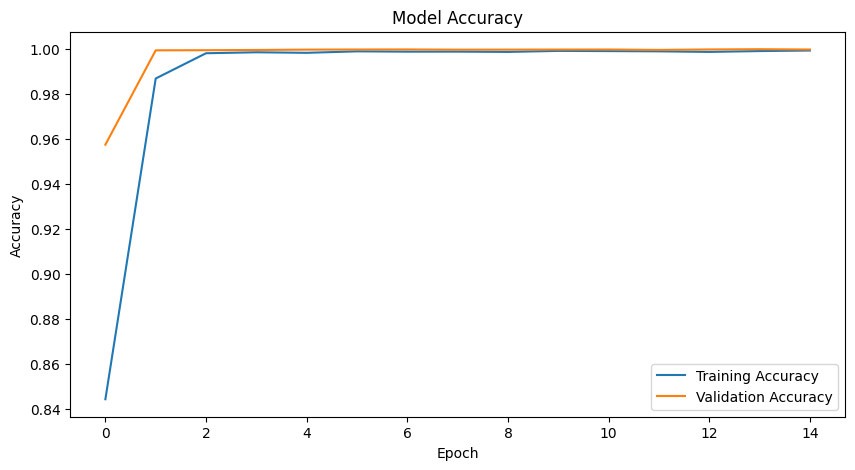

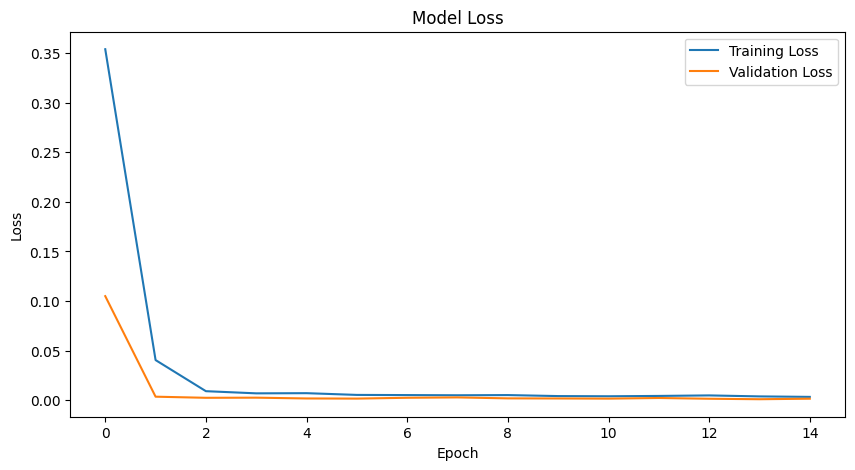

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [35]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

gap = train_acc - val_acc
print("Generalization Gap:", gap)


Generalization Gap: -0.0004527568817138672


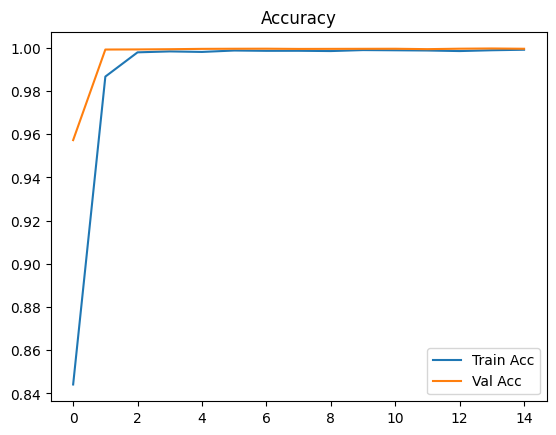

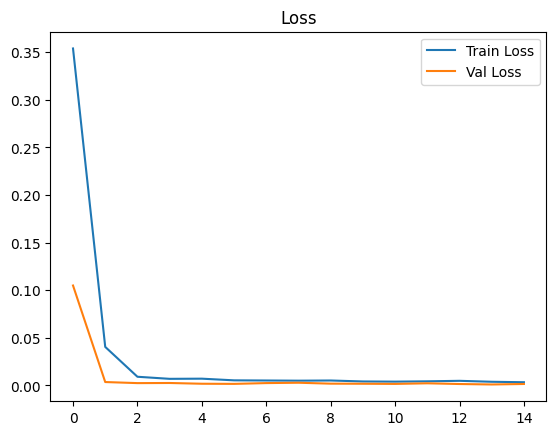

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss')
plt.show()


In [41]:
model.save("cyber_attack_detector.h5")


In [42]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
gap = train_acc - val_acc

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Generalization Gap: {gap:.4f}")


Training Accuracy: 0.9991
Validation Accuracy: 0.9996
Generalization Gap: -0.0005


In [43]:
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]
print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")


Train Loss: 0.0033, Val Loss: 0.0015


In [44]:
import joblib

# For your ML model
joblib.dump(best_automl_model, "ml_model.pkl")

# For your DL model
model.save("dl_model.h5")


In [46]:
import joblib
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model

# Load trained models
ml_model = joblib.load("ml_model.pkl")
dl_model = load_model("dl_model.h5")

# Thresholds for deciding
ATTACK_THRESHOLD = 0.7

# Function to combine predictions
def predict_agent(data: pd.DataFrame):
    # Predict using ML model
    ml_prob = ml_model.predict_proba(data)[:, 1]
    
    # Predict using DL model
    dl_prob = dl_model.predict(data).flatten()
    
    # Combine both predictions (simple average)
    final_prob = (ml_prob + dl_prob) / 2
    
    # Decision
    result = ["Attack" if p > ATTACK_THRESHOLD else "Normal" for p in final_prob]
    
    # Return results
    return pd.DataFrame({
        "ML_Prob": ml_prob,
        "DL_Prob": dl_prob,
        "Final_Prob": final_prob,
        "Decision": result
    })


In [47]:
# Example new data (same columns as training data)
new_data = X_test.head(10)  # or load from CSV

results = predict_agent(new_data)
print(results)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 35, but received input with shape (10, 198)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(10, 198), dtype=float32)
  • training=False
  • mask=None

In [48]:
def predict_agent(data_auto, data_dl):
    """
    data_auto: preprocessed data for ML model (one-hot encoded)
    data_dl: preprocessed data for DL model (label encoded)
    """

    # Predict using ML model
    ml_prob = ml_model.predict_proba(data_auto)[:, 1]

    # Predict using DL model
    dl_prob = dl_model.predict(data_dl).flatten()

    # Combine both predictions (average)
    final_prob = (ml_prob + dl_prob) / 2

    result = ["Attack" if p > 0.7 else "Normal" for p in final_prob]

    return pd.DataFrame({
        "ML_Prob": ml_prob,
        "DL_Prob": dl_prob,
        "Final_Prob": final_prob,
        "Decision": result
    })


In [49]:
# Use matching test data for both models
new_data_auto = X_auto.head(10)
new_data_dl = X_dl.head(10)

results = predict_agent(new_data_auto, new_data_dl)
print(results)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
    ML_Prob       DL_Prob  Final_Prob Decision
0  0.000013  9.319022e-06    0.000011   Normal
1  0.000013  2.154856e-06    0.000008   Normal
2  0.000013  9.371908e-05    0.000054   Normal
3  0.000013  1.657167e-08    0.000007   Normal
4  0.000013  2.143554e-05    0.000017   Normal
5  0.000013  9.620394e-06    0.000011   Normal
6  0.000013  3.350737e-05    0.000023   Normal
7  0.000013  4.520014e-05    0.000029   Normal
8  0.000013  1.969553e-05    0.000016   Normal
9  0.000013  1.857767e-05    0.000016   Normal


In [66]:
import numpy as np
import pandas as pd

class CyberDefenseAgent:
    def __init__(self, ml_model, dl_model, ml_feature_names, threshold=0.7):
        self.ml_model = ml_model
        self.dl_model = dl_model
        self.ml_feature_names = ml_feature_names
        self.threshold = threshold

    def preprocess_ml(self, data):
        """Encode categorical columns for ML model"""
        data_enc = pd.get_dummies(data)
        data_enc = data_enc.reindex(columns=self.ml_feature_names, fill_value=0)
        return data_enc

    def preprocess_dl(self, data):
        """Keep only the same numeric columns the DL model was trained on"""
        # Select numeric columns (or list them manually)
        dl_features = data.select_dtypes(include=[np.number]).columns
        return data[dl_features].to_numpy().astype("float32")

    def predict(self, data):
        # Prepare data for both models
        ml_input = self.preprocess_ml(data)
        dl_input = self.preprocess_dl(data)

        # Predict
        ml_prob = self.ml_model.predict_proba(ml_input)[:, 1]
        dl_prob = self.dl_model.predict(dl_input).flatten()

        # Combine results
        final_prob = (ml_prob + dl_prob) / 2
        decisions = np.where(final_prob > self.threshold, "Attack", "Normal")

        return pd.DataFrame({
            "ML_Prob": ml_prob,
            "DL_Prob": dl_prob,
            "Final_Prob": final_prob,
            "Decision": decisions
        })


In [67]:
agent = CyberDefenseAgent(
    ml_model=ml_model,
    dl_model=model,
    ml_feature_names=ml_model.get_booster().feature_names
)

results = agent.predict(X_test_dl.head(10))
print(results)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
    ML_Prob       DL_Prob  Final_Prob Decision
0  0.999992  2.291347e-05    0.500008   Normal
1  0.999992  9.999580e-01    0.999975   Attack
2  0.999992  5.738368e-06    0.499999   Normal
3  0.999992  8.170881e-14    0.499996   Normal
4  0.999992  1.000000e+00    0.999996   Attack
5  0.999992  9.999960e-01    0.999994   Attack
6  0.999992  1.000000e+00    0.999996   Attack
7  0.999992  1.000000e+00    0.999996   Attack
8  0.999992  1.000000e+00    0.999996   Attack
9  0.999992  3.571832e-05    0.500014   Normal


In [80]:
import joblib

# Save ML model
joblib.dump(ml_model, "ml_model.pkl")

# Save DL model
model.save("dl_model.h5")


In [81]:
ml_model = joblib.load("ml_model.pkl")
from tensorflow.keras.models import load_model
dl_model = load_model("dl_model.h5")


In [82]:
import pandas as pd
import time

while True:
    # Simulate live network data feed
    new_data = pd.read_csv("incoming_packet.csv")  # or from a socket/API
    results = agent.predict(new_data)
    
    if "Attack" in results["Decision"].values:
        print("⚠️ ALERT: Suspicious activity detected!")
    else:
        print("✅ All normal.")
    
    time.sleep(5)  # check every 5 seconds


FileNotFoundError: [Errno 2] No such file or directory: 'incoming_packet.csv'

In [83]:
import pandas as pd
import numpy as np
import time

# ✅ Assuming you still have X_test_dl or X_train_dl from your previous model
feature_names = X_test_dl.columns.tolist()

def generate_synthetic_packets(n_samples=10):
    """
    Generate a synthetic dataset resembling your network data.
    """
    data = {}
    for col in feature_names:
        # Generate realistic random values depending on data type
        if X_test_dl[col].dtype == 'float64' or X_test_dl[col].dtype == 'int64':
            data[col] = np.random.uniform(
                X_test_dl[col].min(), 
                X_test_dl[col].max(), 
                n_samples
            )
        else:
            # For categorical columns (e.g. 'protocol_type')
            data[col] = np.random.choice(X_test_dl[col].unique(), n_samples)

    return pd.DataFrame(data)

# Test it
synthetic_data = generate_synthetic_packets(10)
print("✅ Synthetic data generated:")
print(synthetic_data.head())


✅ Synthetic data generated:
        dur       proto    service     state      spkts      dpkts     sbytes  \
0  2.256786  113.833918  11.219952  1.606518   1.668989  38.674594   1.531646   
1  6.196518    7.513229   9.203573  7.480106  68.926254  64.678084  27.420410   
2  4.688483  110.496005   2.315767  8.306010  69.197372  58.918848  12.231592   
3  5.884990   76.552967   4.818170  2.814715   0.294374  66.327779  70.469156   
4  1.715970  107.862065  10.243486  2.586523  19.652493  21.316256  25.139543   

      dbytes      rate      sload  ...     dmean  trans_depth  \
0  65.475291 -0.226325   6.289519  ...  2.829017    94.355739   
1  41.394619  1.357251   8.382326  ...  4.995480   110.596686   
2  67.742419  1.939634  27.357412  ...  4.817169   125.120469   
3  30.080233  4.489620   4.101166  ...  2.893790     8.227409   
4  59.863845  2.468423  14.305512  ...  0.320339   165.167829   

   response_body_len  ct_src_dport_ltm  ct_dst_sport_ltm  is_ftp_login  \
0          41.311956

In [84]:
while True:
    # Generate new synthetic "live" packets
    new_data = generate_synthetic_packets(10)
    
    # Get AI predictions
    results = agent.predict(new_data)
    
    print("\n===== 🔍 Live Synthetic Traffic Check =====")
    print(results[["Final_Prob", "Decision"]])
    
    # Alert system
    if "Attack" in results["Decision"].values:
        print("⚠️ ALERT: Suspicious activity detected in synthetic traffic!")
    else:
        print("✅ Network status: Normal")
    
    time.sleep(5)  # simulate 5-second refresh cycle


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

===== 🔍 Live Synthetic Traffic Check =====
   Final_Prob Decision
0    0.982791   Attack
1    0.993918   Attack
2    0.500015   Normal
3    0.999996   Attack
4    0.999996   Attack
5    0.999996   Attack
6    0.999996   Attack
7    0.999996   Attack
8    0.999996   Attack
9    0.999996   Attack
⚠️ ALERT: Suspicious activity detected in synthetic traffic!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

===== 🔍 Live Synthetic Traffic Check =====
   Final_Prob Decision
0    0.999996   Attack
1    0.999996   Attack
2    0.999996   Attack
3    0.999996   Attack
4    0.999996   Attack
5    0.999996   Attack
6    0.999996   Attack
7    0.999996   Attack
8    0.999996   Attack
9    0.999996   Attack
⚠️ ALERT: Suspicious activity detected in synthetic traffic!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

===== 🔍 Live Synthetic Traffic Check =====
   Final_Prob Decision
0    0.999988   Attack
1    0.500002   Normal
2    0.999996   Attack
3    0.999996   Attack
4    0.9999

KeyboardInterrupt: 

In [85]:
results.to_csv("synthetic_predictions_log.csv", mode="a", header=False, index=False)
